# Regression Modeling

### Import Libraries and Data

In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import scipy as sp

from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.compose import make_column_transformer, make_column_selector, TransformedTargetRegressor
from sklearn.pipeline import make_pipeline
from sklearn.ensemble import RandomForestRegressor, BaggingRegressor, AdaBoostRegressor, GradientBoostingRegressor

In [2]:
df = pd.read_csv('./data/school_df_v6.csv')

In [3]:
df = df.iloc[:,:45]
df.dropna(how='all', inplace=True)

In [4]:
# drop 2 schools that have no attendance data
df.drop(df[df['code'] == 201].index, inplace = True)
df.drop(df[df['code'] == 347].index, inplace = True)
df = df.replace(-1,np.nan)
df.dropna(how='any',inplace=True)

In [5]:
df = df.replace(-1,np.nan)
df.dropna(how='any',inplace=True)

In [6]:
df.shape

(81, 45)

In [7]:
df.head(2)

,code,name,grade_band,enrollment_SY1718,enrollment_SY1819,star_score_SY1718,star_score_SY1819,star_rating_SY1718,star_rating_SY1819,capacity_SY1718,...,count_20+_SY1718,pct_20+_SY1718,budgeted_amount_FY16,budgeted_enrollment_FY16,budgeted_amount_FY17,budgeted_enrollment_FY17,pct_meet_exceed_math_SY1718,pct_meet_exceed_ela_SY1718,pct_meet_exceed_math_SY1819,pct_meet_exceed_ela_SY1819
0,175.0,School-Within-School @ Goding,Elementary,308.0,313.0,88.55,88.26,5.0,5.0,444.0,...,0.0,0.000000,1.059280e+07,5880.0,3815456.0,2674740.0,0.765,0.765,0.743,0.752
2,202.0,Aiton Elementary School,Elementary,243.0,244.0,43.85,10.79,3.0,1.0,529.0,...,12.0,0.049383,7.429920e+06,2650.0,3780814.0,2499672.0,0.129,0.171,0.153,0.056


In [8]:
df = df[df['star_rating_SY1718'] !=-1]

In [9]:
X=df[['enrollment_SY1718', 'enrollment_SY1819', 'capacity_SY1718', 
        'capacity_SY1819', 'latitude', 'longitude', 'cluster', 'ward','pct_0_SY1819', 
        'pct_1-5_SY1819', 'pct_6-10_SY1819', 'pct_11-20_SY1819', 'pct_20+_SY1819', 
        'pct_0_SY1718', 'pct_1-5_SY1718', 'pct_6-10__SY1718', 'pct_11-20_SY1718', 
        'pct_20+_SY1718', 'budgeted_amount_FY16', 'budgeted_enrollment_FY16', 
        'budgeted_amount_FY17', 'budgeted_enrollment_FY17', 'pct_meet_exceed_math_SY1718', 
        'pct_meet_exceed_ela_SY1718', 'pct_meet_exceed_math_SY1819', 'pct_meet_exceed_ela_SY1819']]

In [10]:
y = df['star_rating_SY1718']

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=7)

In [12]:
sscaler = StandardScaler()
X_train_scaled = sscaler.fit_transform(X_train)
X_test_scaled = sscaler.fit_transform(X_test)

### Null Model

In [13]:
y.value_counts()

3.0    29
2.0    20
4.0    13
5.0    11
1.0     8
Name: star_rating_SY1718, dtype: int64

In [14]:
#null model will be 34.5%
y.value_counts(normalize=True)

3.0    0.358025
2.0    0.246914
4.0    0.160494
5.0    0.135802
1.0    0.098765
Name: star_rating_SY1718, dtype: float64

### Linear Regression

In [15]:
lr = LinearRegression()
lr.fit(X_train_scaled, y_train)
lr.score(X_test_scaled, y_test)

-460845212343844.56

### Ridge

In [16]:
ridge = Ridge()
ridge.fit(X_train_scaled, y_train)
ridge.score(X_test_scaled, y_test)

0.6817591357894337

In [17]:
pipe = make_pipeline(StandardScaler(), Ridge())
params = {'ridge__alpha': ['.01', '0.1', '1', '10', '100', '200', '500', '1000', '10_000'],
          'ridge__normalize': [True, False]}
ridge_grid = GridSearchCV(estimator=pipe, param_grid=params, n_jobs=-1)
ridge_grid.fit(X_train, y_train)
ridge_grid.score(X_test, y_test)

0.7278814777927329

In [19]:
ridge_grid.score(X_train, y_train)

0.7182374882199523

In [32]:
from sklearn.metrics import balanced_accuracy_score

In [36]:
mean_squared_error(y_test, ridge_grid.predict(X_test), squared=False)

0.6618947425880253

In [33]:
y_pred = ridge_grid.predict(X_test)

### Lasso

In [20]:
lasso = Lasso()
lasso.fit(X_train_scaled, y_train)
lasso.score(X_test_scaled, y_test)

-0.057690140845070514

### Decision Tree Regressor

In [21]:
dtree = DecisionTreeRegressor()
dtree.fit(X_train_scaled, y_train)
dtree.score(X_test_scaled, y_test)

0.4971830985915493

In [22]:
dtree_pipe = make_pipeline(StandardScaler(), DecisionTreeRegressor())
params = {'decisiontreeregressor__min_samples_split': [1, 2, 3, 5, 7, 10, 15, 20, 30]}
dtree_grid = GridSearchCV(estimator=dtree_pipe, param_grid=params, n_jobs=-1)
dtree_grid.fit(X_train, y_train)
dtree_grid.score(X_test, y_test)

c:\programdata\miniconda3\lib\site-packages\sklearn\model_selection\_search.py:918: UserWarning: One or more of the test scores are non-finite: [       nan 0.04685359 0.03213849 0.06960711 0.15613876 0.18792431
 0.28296297 0.48970377 0.52352962]
  warnings.warn(


0.49232914059781996

### KNN Regressor

In [23]:
knn = KNeighborsRegressor()
knn.fit(X_train_scaled, y_train)
knn.score(X_test_scaled, y_test)

0.620225352112676

In [24]:
knn_pipe = make_pipeline(StandardScaler(), KNeighborsRegressor())
params = {'kneighborsregressor__n_neighbors': [1, 2, 3, 5, 7, 10, 15, 20, 30],
         'kneighborsregressor__algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute']}
knn_grid = GridSearchCV(estimator=knn_pipe, param_grid=params, n_jobs=-1)
knn_grid.fit(X_train, y_train)
knn_grid.score(X_test, y_test)

0.6909456740442657

### Random Forest Regressor

In [37]:
rforest = RandomForestRegressor()
rforest.fit(X_train_scaled, y_train)
rforest.score(X_test_scaled, y_test)

0.6068829577464789

In [38]:
rforest_pipe = make_pipeline(StandardScaler(), RandomForestRegressor())
params = {'randomforestregressor__n_estimators': [50, 100, 200, 300, 500, 1000]}
rforest_grid = GridSearchCV(estimator=rforest_pipe, param_grid=params, n_jobs=-1)
rforest_grid.fit(X_train, y_train)
rforest_grid.score(X_test, y_test)

0.6287798943661973

In [31]:
rforest_grid.score(X_train, y_train)

0.959005424954792

In [27]:
rforest_grid.best_params_

{'randomforestregressor__n_estimators': 300}

In [28]:
# rforest_pipe = make_pipeline(StandardScaler(), RandomForestRegressor())
# params = {'randomforestregressor__n_estimators': [50, 100, 200, 500],
#          'randomforestregressor__criterion': ["mse", "mae"],
# #          'randomforestregressor__max_depth': ["None", 2, 5, 10, 30],
#          'randomforestregressor__min_samples_split': [2, 5, 10, 15],
#          'randomforestregressor__ccp_alpha': [0.0, 0.0001, 0.01, 0.1, 1, 10],}
# rforest_grid = GridSearchCV(estimator=rforest_pipe, param_grid=params, n_jobs=-1)
# rforest_grid.fit(X_train, y_train)
# rforest_grid.score(X_test, y_test)

In [29]:
rforest_grid.best_params_

{'randomforestregressor__n_estimators': 300}

In [39]:
mean_squared_error(y_test, rforest_grid.predict(X_test), squared=False)

0.773082112314696

In [30]:
# y_pred = rforest_grid.predict(X_test)
# mean_squared_error(y_test, y_pred, squared=False)

### Elastic Net

In [262]:
enet_pipe = make_pipeline(StandardScaler(), ElasticNet())
enet_pipe.fit(X_train, y_train)
enet_pipe.score(X_test, y_test)

0.38567383419938306

### PolynomialFeatures

In [263]:
poly = PolynomialFeatures()
X_poly = poly.fit_transform(X)
X_poly_train, X_poly_test, y_train, y_test = train_test_split(X_poly, y)

sscaler = StandardScaler()
X_poly_train_scaled = sscaler.fit_transform(X_poly_train)
X_poly_test_scaled = sscaler.transform(X_poly_test)

ridge_poly = Ridge()
ridge_poly.fit(X_poly_train_scaled, y_train)
ridge_poly.score(X_poly_test_scaled, y_test)

0.1434082426838913

### Bagging Regressor

In [264]:
bag = BaggingRegressor()
bag.fit(X_train_scaled, y_train)
bag.score(X_test_scaled, y_test)

0.09792968750000008

### Adaboost

In [265]:
ada = AdaBoostRegressor()
ada.fit(X_train_scaled, y_train)
ada.score(X_test_scaled, y_test)

0.06666529932844079

In [266]:
ada_pipe = make_pipeline(StandardScaler(), AdaBoostRegressor())
params = {'adaboostregressor__n_estimators': [50, 100, 200, 300, 500, 1000],
         'adaboostregressor__loss': ['linear', 'square', 'exponential']}
ada_grid = GridSearchCV(estimator=ada_pipe, param_grid=params, n_jobs=-1)
ada_grid.fit(X_train, y_train)
ada_grid.score(X_test, y_test)

0.010243845198376844

### Gradient Boosting Regressor

In [267]:
gboost = GradientBoostingRegressor()
gboost.fit(X_train_scaled, y_train)
gboost.score(X_test_scaled, y_test)

-0.1094085205352886

In [268]:
gboost_pipe = make_pipeline(StandardScaler(), GradientBoostingRegressor())
params = {'gradientboostingregressor__n_estimators': [50, 100, 200, 300, 500, 1000]}
gboost_grid = GridSearchCV(estimator=gboost_pipe, param_grid=params, n_jobs=-1)
gboost_grid.fit(X_train, y_train)
gboost_grid.score(X_test, y_test)

0.0033477224608324807

### Support Vector

In [269]:
svr = SVR(C=3)
svr.fit(X_train_scaled, y_train)
svr.score(X_test_scaled, y_test)

-0.13999487842706837

# Feature Importance & Model Evaluation

In [270]:
# Random Forest Feature Importance
feat_imp = pd.DataFrame(rforest.feature_importances_, index=X.columns)
feat_imp.sort_values(by=0, ascending=False).head(5)

,0
pct_meet_exceed_math_SY1819,0.479004
pct_meet_exceed_math_SY1718,0.159430
pct_meet_exceed_ela_SY1819,0.105614
pct_20+_SY1718,0.031560
cluster,0.029578


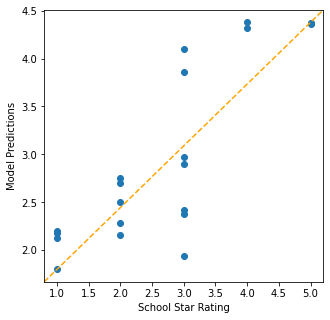

In [298]:
# Random Forest
y_pred = rforest_grid.predict(X_test)
fig, ax = plt.subplots(figsize=(5,5))
plt.scatter(y_test, y_pred)
ax.plot([0,1], [0,1], transform=ax.transAxes, ls="--", c="orange")
# plt.title('Random Forest Grid Model')
plt.xlabel('School Star Rating')
plt.ylabel('Model Predictions');
# plt.savefig('./figures/random_forest_preds.png');

In [299]:
explained_variance_score(y_test, y_pred)

0.6992106406462268

In [300]:
mean_squared_error(y_test, y_pred)

0.5418741406124367

In [301]:
r2_score(y_test, y_pred)

0.6634274704083316

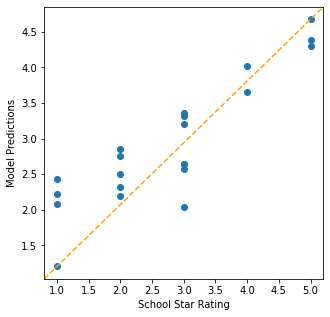

In [285]:
# Ridge Model
y_pred = ridge_grid.predict(X_test)
fig, ax = plt.subplots(figsize=(5,5))
plt.scatter(y_test, y_pred)
ax.plot([0,1], [0,1], transform=ax.transAxes, ls="--", c="orange")
plt.xlabel('School Star Rating')
plt.ylabel('Model Predictions');
# plt.savefig('./figures/ridge_preds.png');

In [296]:
from sklearn.metrics import explained_variance_score, mean_squared_error, r2_score

In [292]:
explained_variance_score(y_test, y_pred)

0.7440290733622903

In [295]:
mean_squared_error(y_test, y_pred)

0.4381046502656682

In [297]:
r2_score(y_test, y_pred)

0.7278814777927329

In [286]:
print(f' ridge score is         {ridge_grid.score(X_test, y_test)}')
print(f' lasso score is        {lasso.score(X_test_scaled, y_test)}')
print(f' dtree_grid score is    {dtree_grid.score(X_test, y_test)}')
print(f' knn_grid score is      {knn_grid.score(X_test, y_test)}')
print(f' rforest_grid score is  {rforest_grid.score(X_test, y_test)}')
print(f' enet_pipe score is     {enet_pipe.score(X_test, y_test)}')
print(f' ridge_poly score is   {ridge_poly.score(X_poly_test_scaled, y_test)}')
print(f' bag score is           {bag.score(X_test_scaled, y_test)}')
print(f' ada_grid score is     {ada_grid.score(X_test, y_test)}')
print(f' gboost score is       {gboost_grid.score(X_test, y_test)}')
print(f' svr score is          {svr.score(X_test_scaled, y_test)}')

 ridge score is         0.7278814777927329
 lasso score is        -0.057690140845070514
 dtree_grid score is    0.49232914059781996
 knn_grid score is      0.6909456740442657
 rforest_grid score is  0.6634274704083316
 enet_pipe score is     0.38567383419938306
 ridge_poly score is   -1.3806292355330734
 bag score is           -0.29519718309859155
 ada_grid score is     -0.40584800549522004
 gboost score is       -0.5151132381847154
 svr score is          -0.40079469275440127


In [170]:
# Models that did perform well:
# ridge score
# dtree_grid score
# knn_grid score
# rforest_grid score

In [171]:
# Models that did not perform well:
# lasso score
# enet_pipe score
# ridge_poly score
# bag score
# ada_grid score
# gboost score
# svr score

In [172]:
# Top 5 Features:
# pct_meet_exceed_math_SY1819
# pct_meet_exceed_ela_SY1718
# pct_meet_exceed_math_SY1718
# pct_meet_exceed_ela_SY1819
# pct_11-20_SY1819

# Bottom 5 Features:
# ward
# pct_0_SY1819
# budgeted_enrollment_FY17
# pct_11-20_SY1718
# enrollment_SY1718

In [303]:
# Random Forest Feature Importance
feat_imp = pd.DataFrame(rforest.feature_importances_, index=X.columns)
feat_imp.sort_values(by=0, ascending=True).head(5)

,0
enrollment_SY1718,0.002168
capacity_SY1718,0.002913
budgeted_enrollment_FY17,0.002939
budgeted_amount_FY17,0.003922
pct_0_SY1819,0.004076


In [ ]:

enrollment_SY1718
capacity_SY1718
budgeted_enrollment_FY17
budgeted_amount_FY17
pct_0_SY1819